# Exploring the claimant reliability dataset

In [2]:
# import requirements
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

In [3]:
# code for loading the dataset

from util import gather_dataset

# load the dataset using custom function
df = gather_dataset('./data/claimant_data_processed/')

df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5


In [4]:
# wrapper for printing results of functions

def print_formatting(func: Callable) -> Callable:
    """Decorator for printing formatting around the function prints"""

    def wrapper(*args, **kwargs):
        padd = '-'
        print(f'{" "+func.__name__+"() ":{padd}^80}')
        docstring = f'"""{func.__doc__}"""'
        print(f'{docstring:^80}\n')
        func(*args, **kwargs)
        print('-' * 80 + '\n')

    return wrapper


In [83]:
@print_formatting
def find_pilot_duplicates(pilot_path: str) -> None:
    """Test if there are duplicates of the text in the pilot in the other batches"""

    pilot_df = pd.read_csv(pilot_path)

    main_df = pd.DataFrame()
    data_path = '/'.join(pilot_path.split('/')[:-1]) + '/'
    for file in os.listdir(data_path):
        if file.endswith('.csv') and not file.endswith('b1.csv'):
            main_df = pd.concat([main_df, pd.read_csv(os.path.join(data_path, file))])


    overlap = pd.merge(pilot_df, main_df, how='inner', on=['publisher','sentence', 'tokens_id'])

    if overlap.empty:
        print('No duplicates found')
    else:
        print('Duplicates found:')
        print(overlap.to_string())
    
find_pilot_duplicates('./data/claimant_data/aggregated/Rating the Reliability of Sources and Publishers - b1.csv')

--------------------------- find_pilot_duplicates() ----------------------------
"""Test if there are duplicates of the text in the pilot in the other batches"""

No duplicates found
--------------------------------------------------------------------------------



## Basic Overview

In [84]:
@print_formatting
def unique_tasks(df: pd.DataFrame) -> None:
    """Counts the amount of unique tasks in the dataset"""

    unique_ids = df['task_id'].unique()

    print(f'There are {len(unique_ids)} tasks in this dataset')

unique_tasks(df)

-------------------------------- unique_tasks() --------------------------------
             """Counts the amount of unique tasks in the dataset"""             

There are 2444 taks in this dataset
--------------------------------------------------------------------------------



---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

score
0     359
1    2483
2    3304
3    5299
4    3253
5    2560
Name: count, dtype: int64
--------------------------------------------------------------------------------



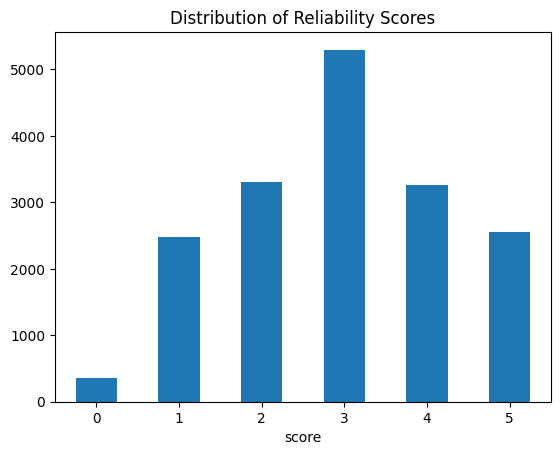

In [85]:
@print_formatting
def reliability_scores_distribution(column: pd.Series) -> None:
    """Prints the distribution of the (reliability) scores in a column"""

    print(column.value_counts().sort_index())

    # df.hist(column='z_score', bins=10, grid=False)
    column.value_counts().sort_index().plot(kind='bar', title='Distribution of Reliability Scores', rot=True)

reliability_scores_distribution(df['score'])

### Worker statistics

In [86]:
# count how many workers participated in the task

@print_formatting
def count_unique(df: pd.DataFrame, colname: str) -> None:
    """Prints the number of unique values in a column"""

    print(f'{len(df[colname].unique())} different {colname.split("_")[0]}s occur in the task.')

count_unique(df, 'worker_id')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

107 different workers occur in the task.
--------------------------------------------------------------------------------



------------------------ count_judgements_per_worker() -------------------------
                """Prints the number of judgements per worker"""                

Average amount of judgements per worker: 161.290


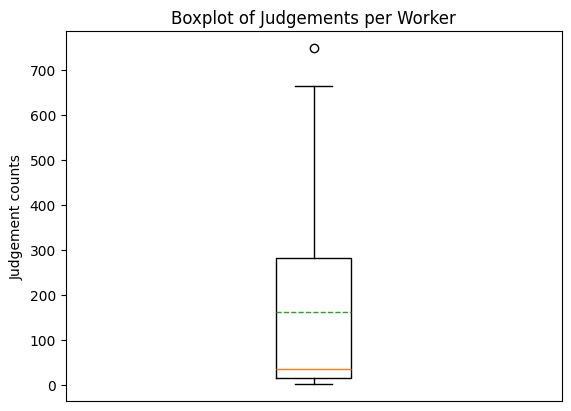

--------------------------------------------------------------------------------



In [87]:
@print_formatting
def count_judgements_per_worker(df: pd.DataFrame) -> None:
    """Prints the number of judgements per worker"""

    # average number of judgements per user
    judgements_per_worker = df['worker_id'].value_counts()
    print(f'Average amount of judgements per worker: {judgements_per_worker.mean():.3f}')

    # boxplot of judgements per user
    plt.boxplot(judgements_per_worker, showmeans=True, meanline=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.title('Boxplot of Judgements per Worker')
    plt.ylabel('Judgement counts')
    plt.show()

count_judgements_per_worker(df)

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: 2.9435624058407694
Average score per worker:
                  mean  support
worker_id                      
23QWQCPZ7PNP  5.000000        1
2AZWNZRTVACE  2.872727      110
2GKTZAGQYCN4  3.024133      663
2KJAY9AMYRCD  2.390681      279
2ME4D2R27FJK  3.088235      102
2VHW4RE6AKTN  2.400000       15
32MTNCTCCVR6  3.285714       49
36DRXJNMPXGF  2.568093      514
3GM49GZGVH4A  3.458333       24
3HDZDWXPEQAE  2.400000        5
3MEG6THYHV69  3.133333       15
4ACJA6QTDYMG  2.401070      748
4QHKZTW26XFW  3.493506      308
4REVNE2CDF7H  2.936170       47
4TNHZX6VKQAA  3.000000       13
64AFFXCKWR7N  3.295031      644
67HP3WRN63ZJ  3.062500       16
6CNHTCG6W6XM  2.969811      265
72TDDMF6WWVT  2.581633      588
76VNAHQ9VAC3  3.333333       15
7R2NKCJQNXPP  3.058296      446
7YG43VN77NW3  2.68

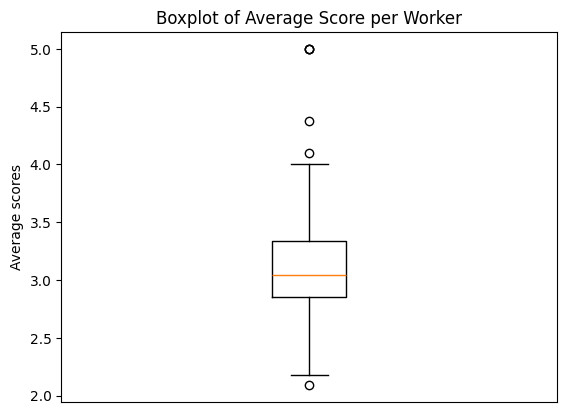

--------------------------------------------------------------------------------



In [88]:
@print_formatting
def score_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Average reliability score per worker: {df[colname].mean()}')

    # compute average per worker
    scores = pd.merge(df.groupby('worker_id')[colname].mean(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'mean', 'score_y': 'support'}, inplace=True)
    print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    plt.boxplot(df.groupby('worker_id')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()

score_per_worker(df, 'score')

------------------------------ stdev_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Overall standard deviation for all scores: 1.3164048390864498
Average score per worker:
                 stdev  support
worker_id                      
23QWQCPZ7PNP       NaN        1
2AZWNZRTVACE  1.502958      110
2GKTZAGQYCN4  1.268735      663
2KJAY9AMYRCD  0.993533      279
2ME4D2R27FJK  1.227595      102
2VHW4RE6AKTN  1.352247       15
32MTNCTCCVR6  1.060660       49
36DRXJNMPXGF  1.333419      514
3GM49GZGVH4A  1.062367       24
3HDZDWXPEQAE  1.516575        5
3MEG6THYHV69  1.552264       15
4ACJA6QTDYMG  1.070274      748
4QHKZTW26XFW  1.366165      308
4REVNE2CDF7H  1.552057       47
4TNHZX6VKQAA  0.816497       13
64AFFXCKWR7N  1.261922      644
67HP3WRN63ZJ  1.436141       16
6CNHTCG6W6XM  1.065574      265
72TDDMF6WWVT  1.106802      588
76VNAHQ9VAC3  0.975900       15
7R2NKCJQNXPP  1.268888      446
7YG43VN77NW3 

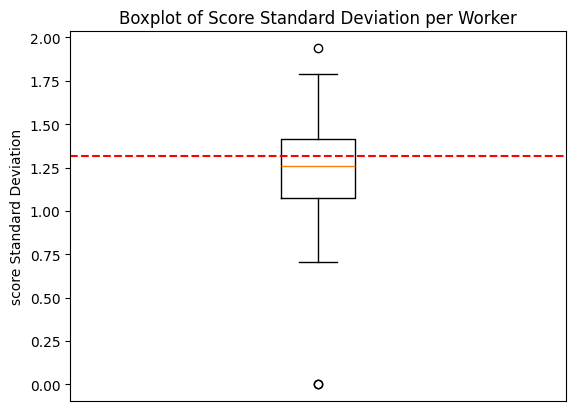

--------------------------------------------------------------------------------



In [89]:

@print_formatting
def stdev_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Overall standard deviation for all {colname}s: {df[colname].std()}')

    # compute stdev per worker
    scores = pd.merge(df.groupby('worker_id')[colname].std(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'stdev', 'score_y': 'support'}, inplace=True)
    print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    print(df.groupby('worker_id')[colname].std().fillna(0))
    plt.boxplot(df.groupby('worker_id')[colname].std().dropna())
    plt.title(f'Boxplot of {colname.capitalize()} Standard Deviation per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'{colname} Standard Deviation')
    plt.axhline(df[colname].std(), color='r', linestyle='--', label='Overall Stdev')
    plt.show()

stdev_per_worker(df, 'score')

### Publisher statistics

In [90]:
# count how many unique publishers there are in the dataset
count_unique(df, 'publisher')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

146 different publishers occur in the task.
--------------------------------------------------------------------------------



---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               

The mean reliability score per publisher is:

21st Century Wire                                          2.544828
@berkeleywellness                                          2.539683
ABC News                                                   4.000000
AGE OF AUTISM                                              2.000000
Activist Post                                              2.235294
Ars Technica                                               3.196429
Atlas Monitor                                              2.285714
BBC News                                                   3.750000
Backyard Secret Exposed                                    2.300752
Banning-Beaumont CA Patch                                  3.944853
CIDRAP                                                     3.166667
CNN                                        

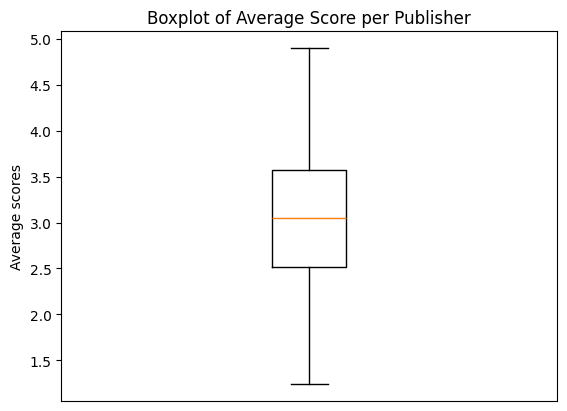

--------------------------------------------------------------------------------



In [91]:
@print_formatting
def score_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the scores in `colname` per publisher"""

    unique_publishers = df['publisher'].unique()    

    print('The mean reliability score per publisher is:')
    print(df.groupby('publisher')[colname].mean().to_string().lstrip('publisher'))
    print()

    # create boxplot of average scores per publisher
    plt.boxplot(df.groupby('publisher')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Publisher')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()


score_per_publisher(df, 'score')

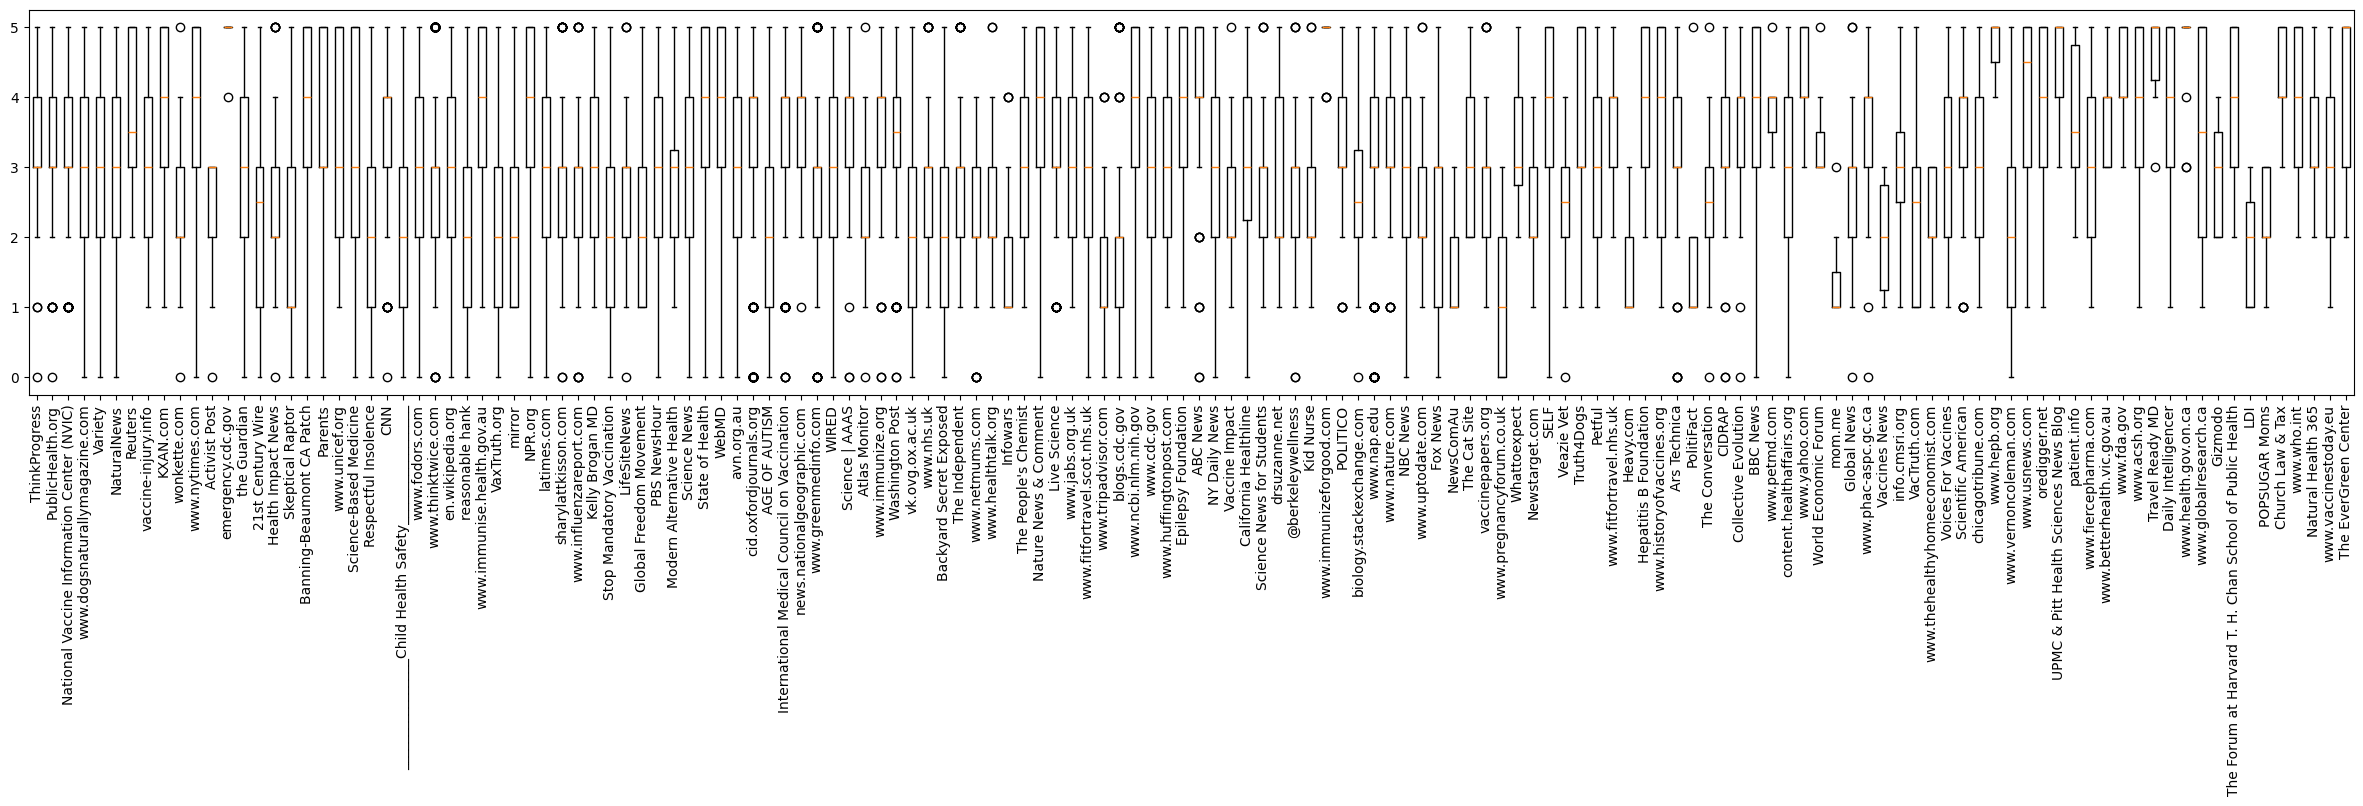

In [92]:
# boxplot per publisher
def boxplot_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the boxplot of scores in `colname` per publisher"""

    unique_publishers = df['publisher'].unique()    

    # print large overview boxplots
    plt.figure(figsize=(30, 5))
    plt.boxplot([df[df['publisher']==publisher][colname] for publisher in unique_publishers], labels=unique_publishers)
    plt.xticks(rotation=90)
    plt.show()
    
    # uncomment to print boxplot per publisher
    # for publisher in df["publisher"].unique():
    #     df[df["publisher"] == publisher].boxplot(column="score")
    #     plt.title(f"{publisher} (support: {df[df['publisher'] == publisher]['score'].count()})")
    #     plt.show()

boxplot_per_publisher(df, 'score')

## Z-score data per task and run some visualizations/statistics again

#### Z-score per task

In [4]:
from util import z_score_per_task

df = z_score_per_task(df)
df.head()

/home/bbjoverbeek/master_thesis/util.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_scores_df = pd.concat(


,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score_task
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5,1.257237
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5,0.816497


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score_task
-3.0       2
-2.9       1
-2.7       1
-2.6       1
-2.4      76
-2.3      23
-2.2     105
-2.1      27
-2.0     103
-1.9     166
-1.8     186
-1.7     193
-1.6     213
-1.5     250
-1.4     270
-1.3     473
-1.2     426
-1.1     211
-1.0     542
-0.9     527
-0.8     674
-0.7     224
-0.6     812
-0.5     383
-0.4     753
-0.3     313
-0.2     620
-0.1     312
 0.0    1096
 0.1     321
 0.2     651
 0.3     334
 0.4     865
 0.5     460
 0.6     973
 0.7     204
 0.8     695
 0.9     579
 1.0     657
 1.1     238
 1.2     459
 1.3     440
 1.4     207
 1.5     231
 1.6     189
 1.7     182
 1.8     182
 1.9     153
 2.0      82
 2.1      20
 2.2      86
 2.3      17
 2.4      46
 2.5       1
 2.6       3
Name: count, dtype: int64
--------------------------------------------------------------------------------



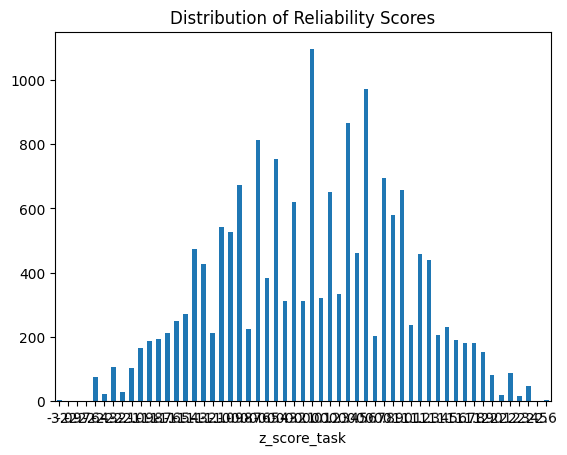

In [94]:
reliability_scores_distribution(df['z_score_task'].round(1))

### Worker statistics

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: 4.631826270310075e-19
Average z_score_task per worker:
              z_score_task_x  z_score_task_y
worker_id                                   
23QWQCPZ7PNP        0.777778               1
2AZWNZRTVACE        0.048058             110
2GKTZAGQYCN4        0.041381             663
2KJAY9AMYRCD       -0.493999             279
2ME4D2R27FJK       -0.026523             102
2VHW4RE6AKTN       -0.692842              15
32MTNCTCCVR6        0.065927              49
36DRXJNMPXGF       -0.314643             514
3GM49GZGVH4A        0.461424              24
3HDZDWXPEQAE       -0.137849               5
3MEG6THYHV69        0.015131              15
4ACJA6QTDYMG       -0.519237             748
4QHKZTW26XFW        0.592802             308
4REVNE2CDF7H        0.157449              47
4TNHZX6VKQAA       -0.37

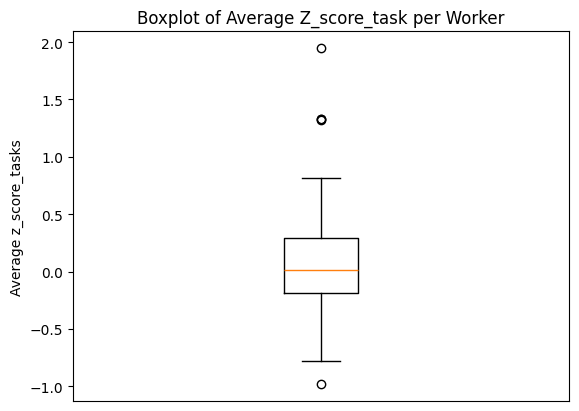

--------------------------------------------------------------------------------



In [95]:
score_per_worker(df, 'z_score_task')

------------------------------ stdev_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Overall standard deviation for all z_score_tasks: 0.9950622719578324
Average z_score_task per worker:
              z_score_task_x  z_score_task_y
worker_id                                   
23QWQCPZ7PNP             NaN               1
2AZWNZRTVACE        1.005833             110
2GKTZAGQYCN4        0.922123             663
2KJAY9AMYRCD        0.843327             279
2ME4D2R27FJK        0.877680             102
2VHW4RE6AKTN        0.932022              15
32MTNCTCCVR6        0.668465              49
36DRXJNMPXGF        0.930335             514
3GM49GZGVH4A        0.953253              24
3HDZDWXPEQAE        1.494301               5
3MEG6THYHV69        0.658682              15
4ACJA6QTDYMG        0.906822             748
4QHKZTW26XFW        0.848127             308
4REVNE2CDF7H        1.093090              47
4TNHZX6VKQAA   

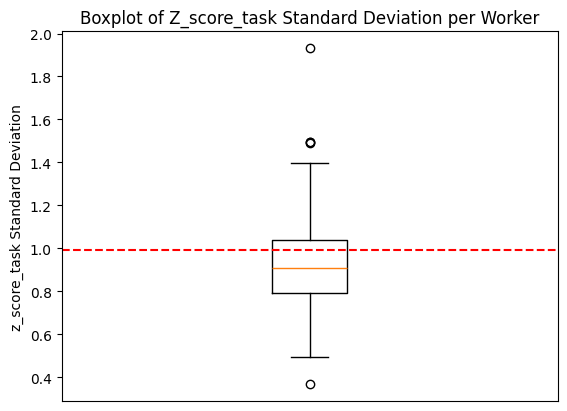

--------------------------------------------------------------------------------



In [96]:
# standard deviation of the workers individually vs the standard deviation of all workers
stdev_per_worker(df, 'z_score_task')

#### Publisher statistics

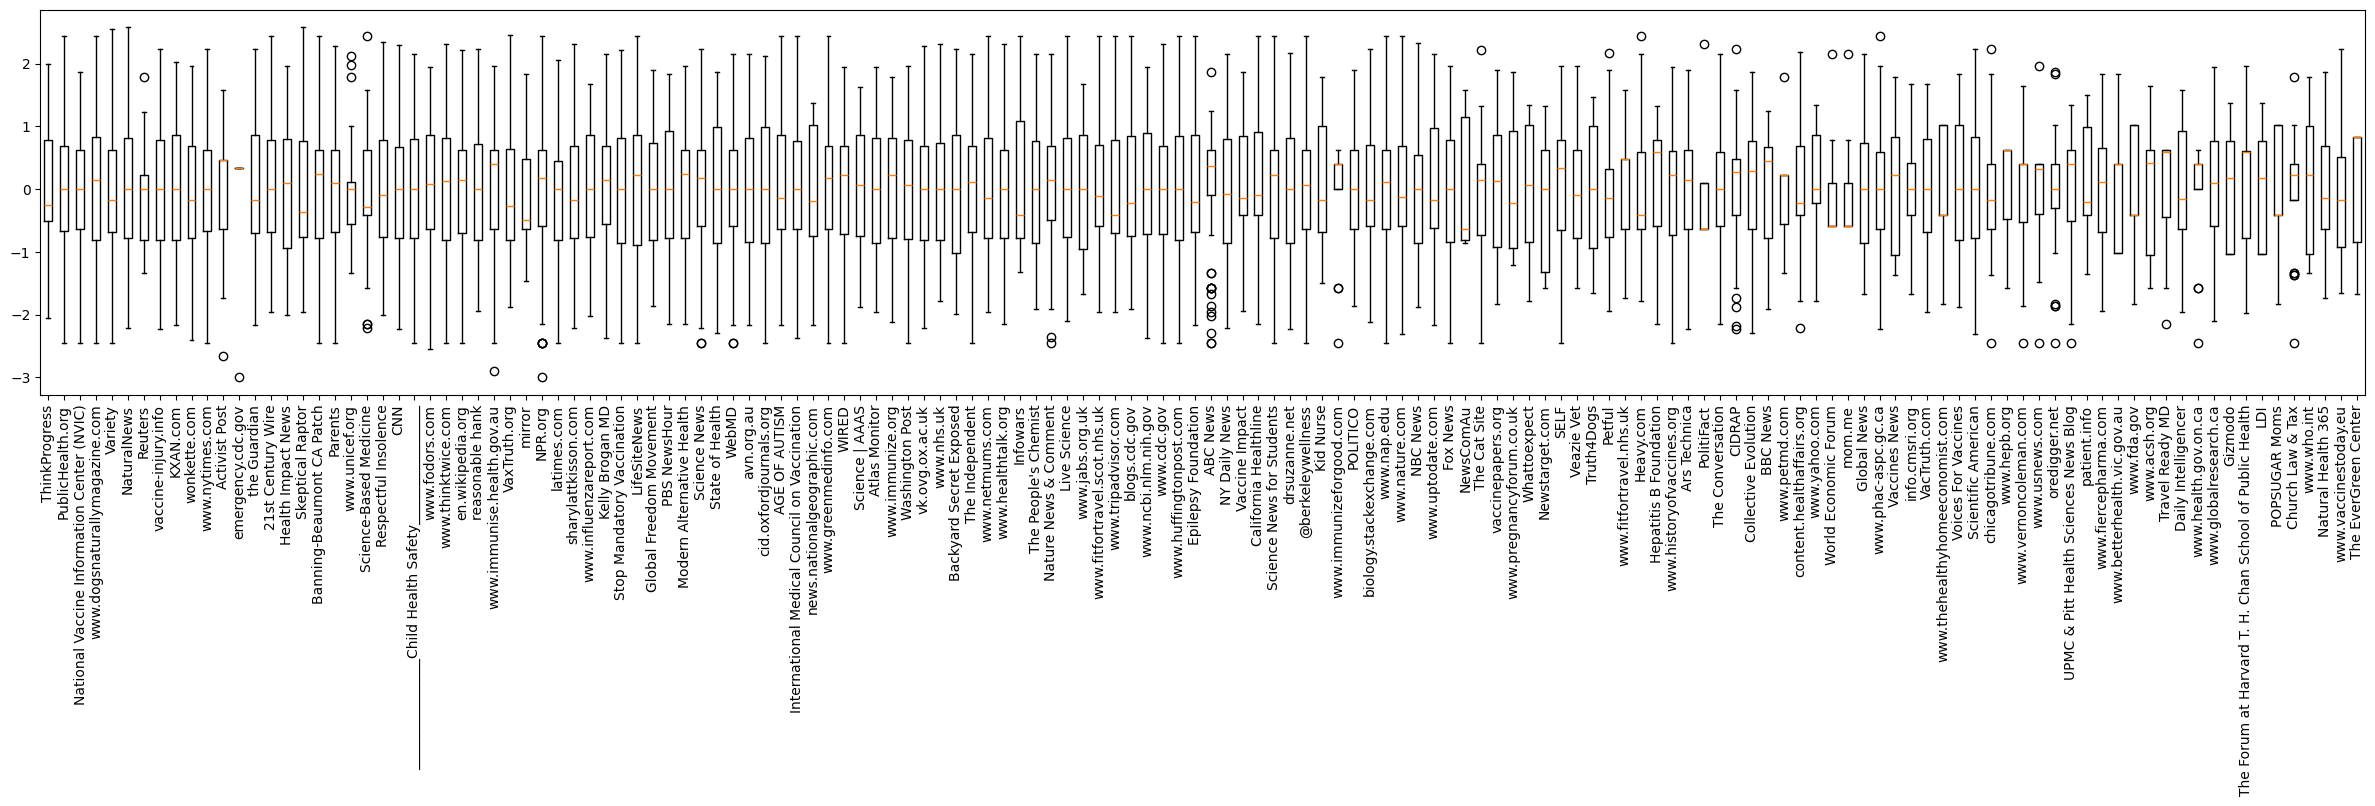

In [97]:
boxplot_per_publisher(df, 'z_score_task')

### Z-score per worker

In [5]:
from util import z_score_per_worker

df = z_score_per_worker(df)
df.head()

/home/bbjoverbeek/master_thesis/util.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_scores_df = pd.concat(


,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score_task,z_score_worker
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778,0.000000
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,-0.447214
2,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,1.341641
3,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,0.447214
4,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,-1.341641


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score_worker
-4.0        59
-3.9       140
-3.6      2044
-3.2       675
-3.0      7624
-2.9       140
-2.8      6332
-2.7        18
-2.6      3122
-2.5      5281
-2.4     22612
-2.3     20616
-2.2     43116
-2.1      4074
-2.0      7548
-1.9     41696
-1.8     62637
-1.7     26089
-1.6    194039
-1.5     92203
-1.4    193128
-1.3    244572
-1.2    224637
-1.1     74679
-1.0    100651
-0.9     96477
-0.8    239539
-0.7    139554
-0.6     65461
-0.5    507678
-0.4    359177
-0.3    282946
-0.2    200215
-0.1    149238
 0.0    266043
 0.1    426135
 0.2    152645
 0.3    393876
 0.4    167620
 0.5     49107
 0.6    424605
 0.7    102809
 0.8    162486
 0.9    196500
 1.0    319154
 1.1    233289
 1.2    113243
 1.3     86955
 1.4    138151
 1.5    118939
 1.6    147957
 1.7     97598
 1.8     70831
 1.9     39982
 2.0     809

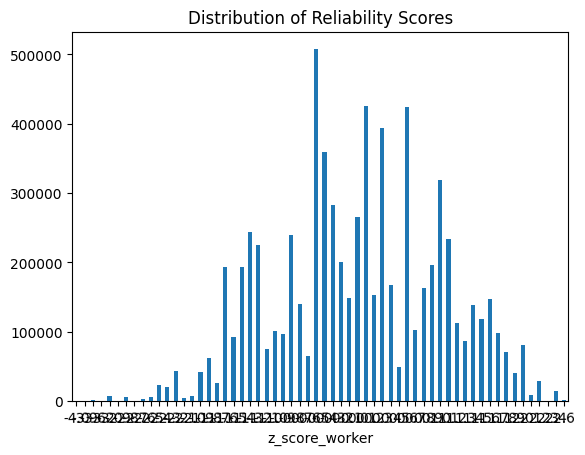

In [99]:
reliability_scores_distribution(df['z_score_worker'].round(1))

#### Worker statistics

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score per worker: 2.4099209659576503e-17
Average z_score_worker per worker:
              z_score_worker_x  z_score_worker_y
worker_id                                       
23QWQCPZ7PNP      0.000000e+00                 1
2AZWNZRTVACE      6.461314e-17             12100
2GKTZAGQYCN4      8.975559e-17            439569
2KJAY9AMYRCD      2.005493e-16             77841
2ME4D2R27FJK     -7.836868e-17             10404
2VHW4RE6AKTN      5.896518e-17               225
32MTNCTCCVR6      1.268826e-16              2401
36DRXJNMPXGF     -1.408303e-16            264196
3GM49GZGVH4A     -1.480297e-16               576
3HDZDWXPEQAE      8.437695e-17                25
3MEG6THYHV69      5.822503e-17               225
4ACJA6QTDYMG      1.377385e-16            559504
4QHKZTW26XFW      4.469495e-17             94864
4REVNE

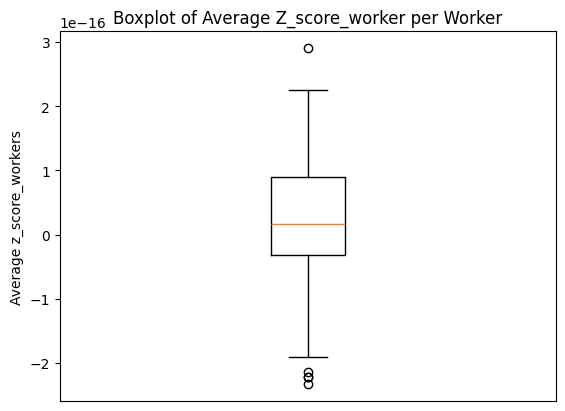

--------------------------------------------------------------------------------



In [100]:
score_per_worker(df, 'z_score_worker')

#### Publisher statistics

---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               

The mean reliability score per publisher is:

21st Century Wire                                          1.856514e-17
@berkeleywellness                                          1.269315e-17
ABC News                                                  -3.483425e-18
AGE OF AUTISM                                              1.263528e-17
Activist Post                                              3.145055e-17
Ars Technica                                               1.095901e-17
Atlas Monitor                                              2.211276e-17
BBC News                                                   3.212380e-17
Backyard Secret Exposed                                    7.640035e-19
Banning-Beaumont CA Patch                                  1.517390e-17
CIDRAP                                                     2.213149e-17

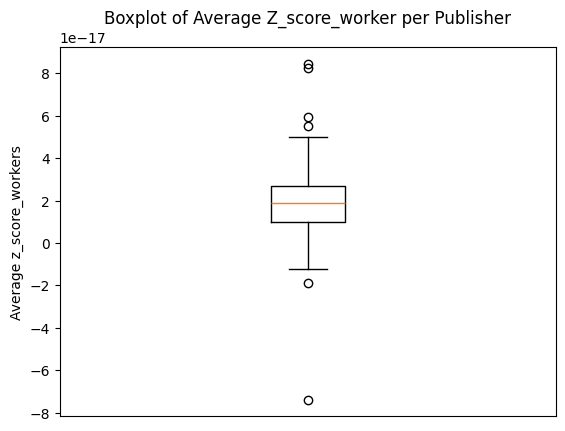

--------------------------------------------------------------------------------



In [101]:
score_per_publisher(df, 'z_score_worker')

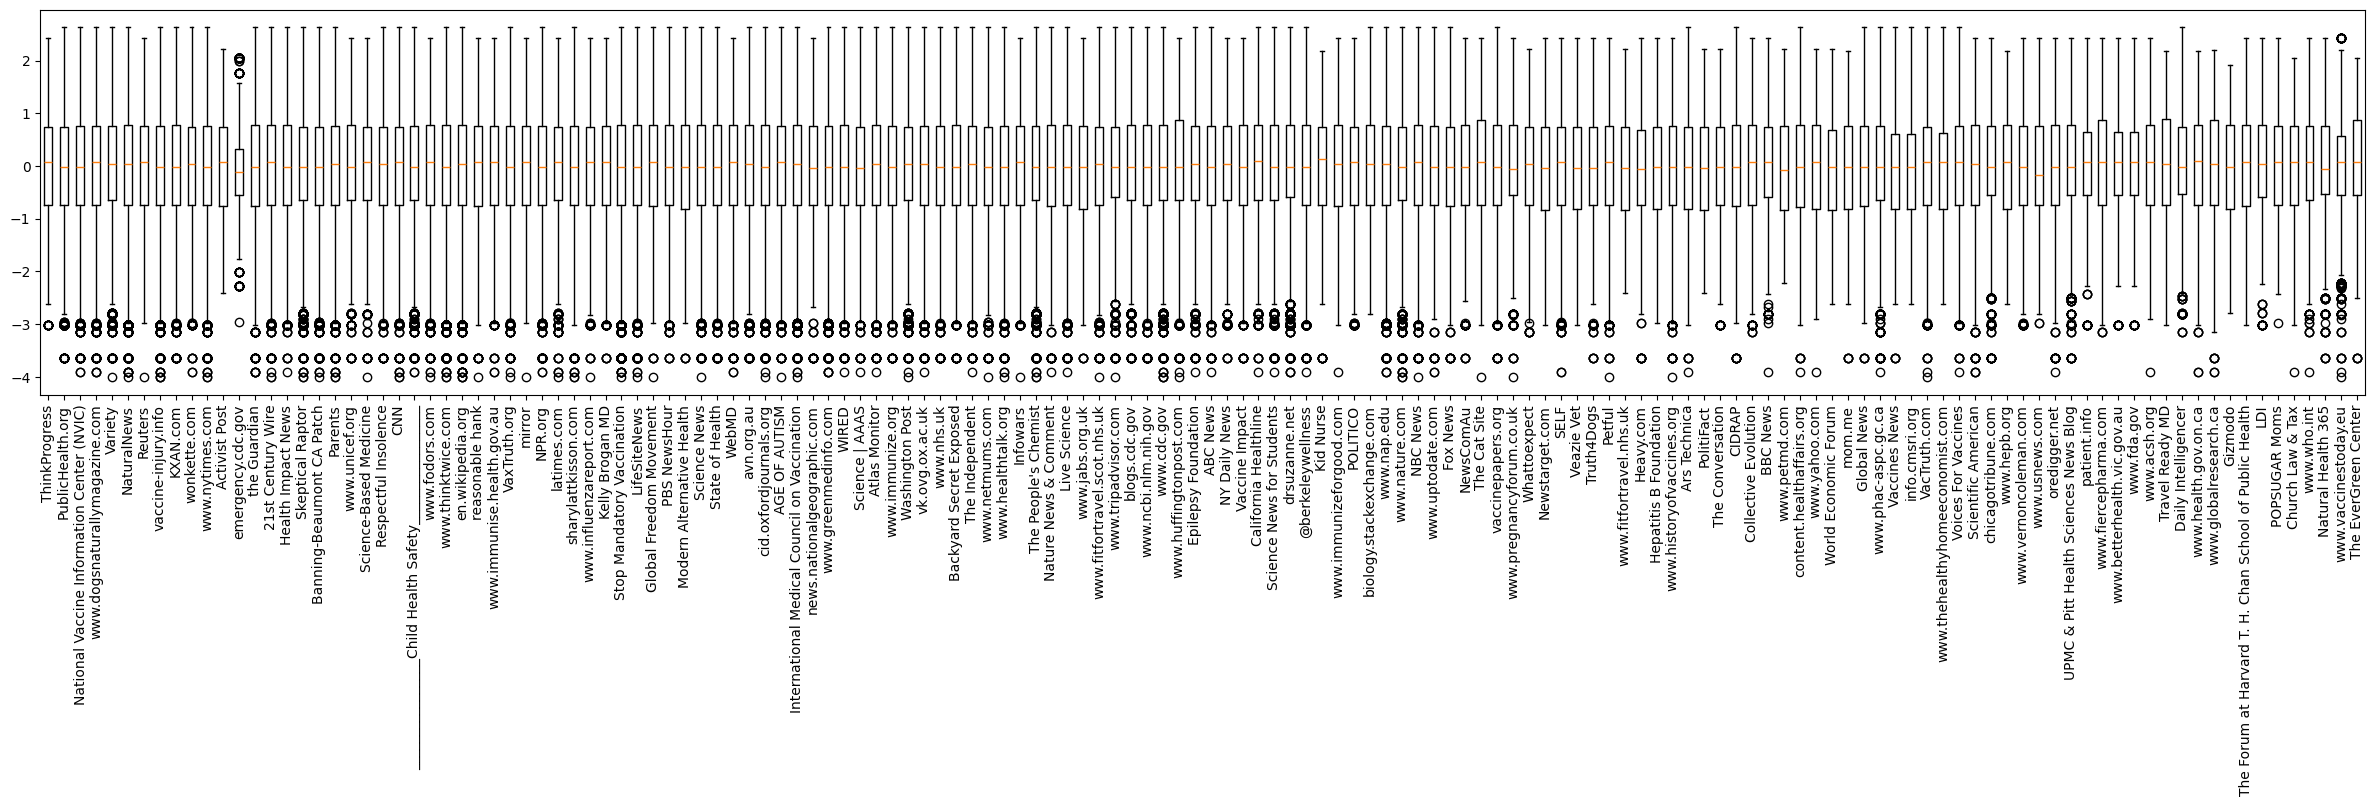

In [102]:
boxplot_per_publisher(df, 'z_score_worker')

## Zero-scores

---------------------------- zero_scores_per_task() ----------------------------
                  """Prints the distribution of zero scores"""                  

There are 2195 tasks that did not receive zero scores, and 249 tasks that did receive zero scores.
See the distribution of zero scores below:
--------------------------------------------------------------------------------



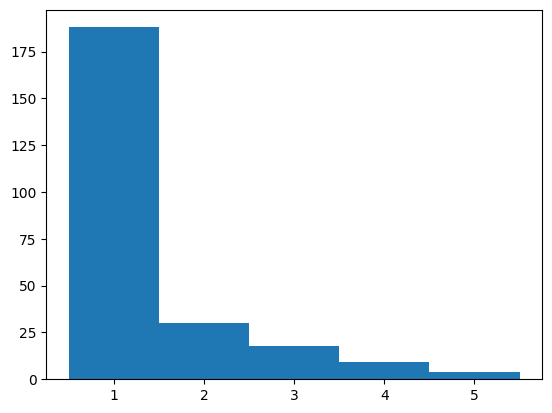

In [9]:
# make histogram of tasks scored with 0
@print_formatting
def zero_scores_per_task(df: pd.DataFrame) -> None:
    """Prints the distribution of zero scores"""

    zero_scores = []
    for task_id in df['task_id'].unique():
        zero_scores.append(df[df['task_id'] == task_id]['score'].value_counts().get(0))
        # print(task_id, zero_scores)

    zero_scores_series = pd.Series(zero_scores)

    print(f'There are {zero_scores_series.isnull().sum()} tasks that did not receive zero scores, and {zero_scores_series.count()} tasks that did receive zero scores.')
    print('See the distribution of zero scores below:')

    # make histogram of tasks scored with 0
    zero_scores_series.hist(bins=5, align='left', grid=False)

zero_scores_per_task(df)

----------------------------- worker_zero_scores() -----------------------------
   """Prints the number of workers that used 0 to score at least one task"""    

47 workers used 0 to score at least one task, and 60 workers did not.
--------------------------------------------------------------------------------



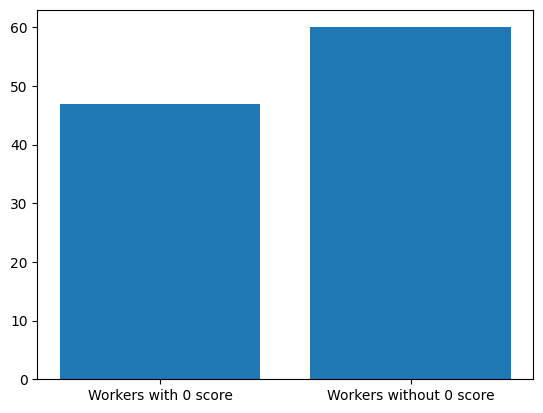

In [5]:
# count how many annotators used 0 to score a task

@print_formatting
def worker_zero_scores(df = pd.DataFrame) -> None:
    """Prints the number of workers that used 0 to score at least one task"""

    workers_with_zero_score = 0
    for worker_id in df['worker_id'].unique():
        if 0 in df[df['worker_id'] == worker_id]['score'].values:
            workers_with_zero_score += 1

    print(f'{workers_with_zero_score} workers used 0 to score at least one task, and {len(df["worker_id"].unique()) - workers_with_zero_score} workers did not.')
    
    plt.bar(['Workers with 0 score', 'Workers without 0 score'], [workers_with_zero_score, len(df["worker_id"].unique()) - workers_with_zero_score])


worker_zero_scores(df)

### Claimant visualization

In [6]:
import seaborn as sns

In [6]:
# add mean worker and mean claimant scores to each example
scatter_df = df.drop('z_score_task', axis=1)

# add the average z_score per worker to each example the worker provided
scatter_df = pd.merge(df.groupby('worker_id')['z_score_worker'].mean(), scatter_df, on='worker_id')
scatter_df = scatter_df.rename(columns={'z_score_worker_y': 'z_score_worker_mean'})

# do the same for each claimant
scatter_df = pd.merge(df.groupby('source')['z_score_worker'].mean(), scatter_df, on='source')
scatter_df = scatter_df.rename(columns={'z_score_worker_x': 'z_score_claimant_mean'})

scatter_df.head()

,source,z_score_worker,worker_id,z_score_claimant_mean,task_id,task_response_id,file_id,sentence,tokens_id,publisher,reliability,Optional Comments:,batch_no,score,z_score_worker_mean
0,' easytraveler ',3.090821e-17,3MEG6THYHV69,5.822503e-17,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2,-0.088911
1,' easytraveler ',3.090821e-17,3MEG6THYHV69,5.822503e-17,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2,0.577920
2,' easytraveler ',3.090821e-17,3MEG6THYHV69,5.822503e-17,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2,-0.755742
3,' easytraveler ',3.090821e-17,3MEG6THYHV69,5.822503e-17,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2,-0.755742
4,' easytraveler ',3.090821e-17,3MEG6THYHV69,5.822503e-17,999c9311-7a30-42d9-861e-7bac738db793,455befca-210d-4aa2-ac10-ed8501eb5457,fodors-com_20161027T194550.conll.annot,72,29 30 31,www.fodors.com,2 - The source is somewhat unreliable,NaN,1,2,1.244752


<Axes: xlabel='z_score_claimant_mean', ylabel='z_score_worker_mean'>

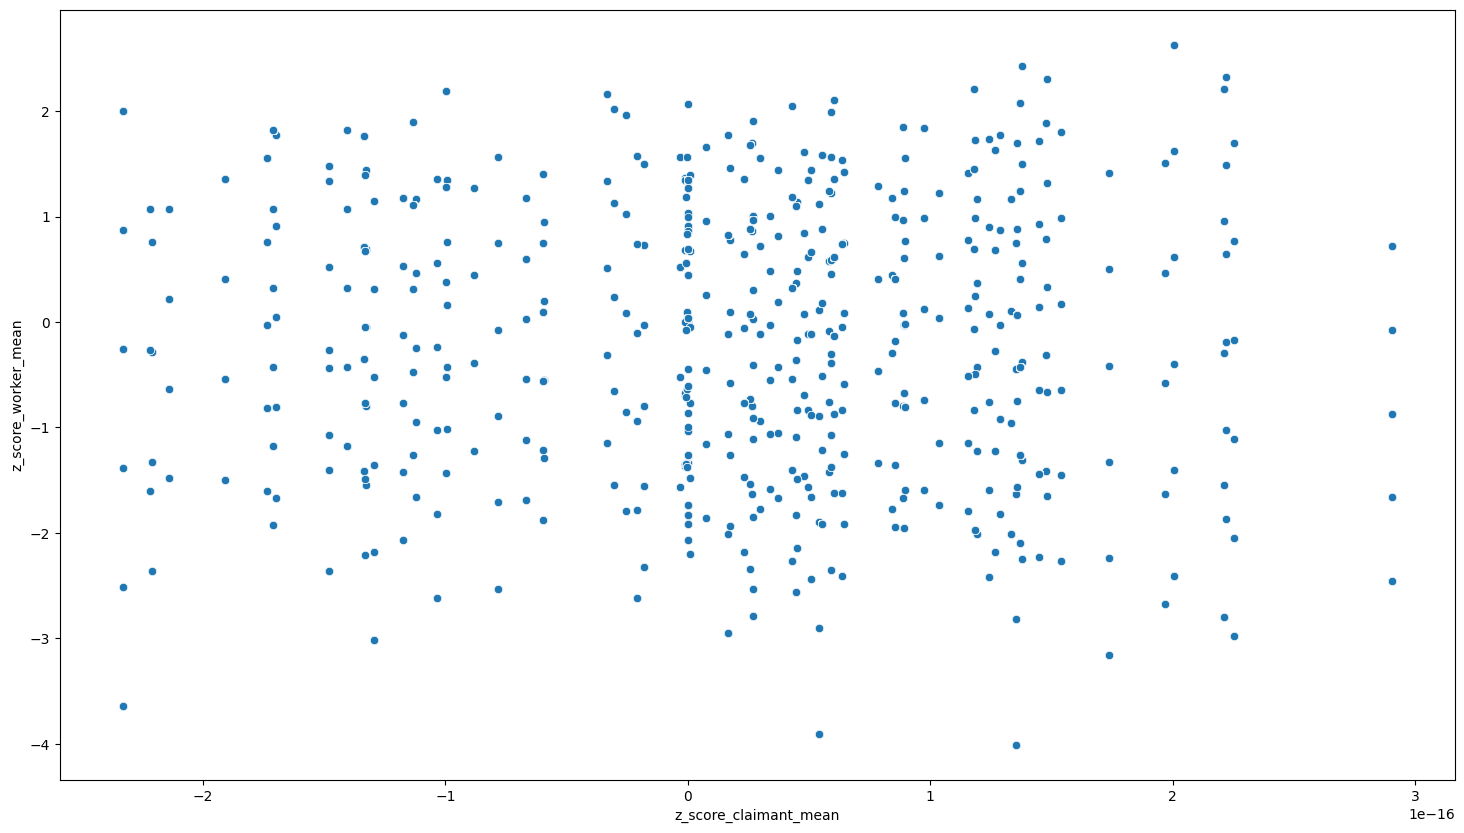

In [20]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='z_score_claimant_mean', y='z_score_worker_mean', data=scatter_df)